# Applied Computational Intelligence - HW2

Authors
- Brewton Morais
- Lucas Abdalah

In [44]:
# Packages and Data Import
from tkinter import OFF
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import zscore, norm, linregress
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import boxplot_stats

# Solubility data divided into train and test sets
X_test = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTestX.csv")
X_train = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTrainX.csv")
Y_train = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTrainY.csv")
Y_test = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTestY.csv")




In [45]:
# concatenate data
X= pd.concat([X_train, X_test], axis=0)
Y = pd.concat([Y_train, Y_test], axis = 0)

# Target: solubility of chemical compound
data = pd.concat([X, Y], axis = 1)
data = data.rename(columns={'x':'solubility'})

In [46]:
data.head(5)

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2,solubility
0,0,1,0,0,1,0,0,1,0,0,...,2,0,0,0,0,3,-0.856,25.78,25.78,-3.97
1,0,1,0,1,1,1,1,1,0,0,...,3,1,1,0,0,4,-0.370,52.19,80.43,-3.98
2,1,1,1,1,1,0,0,1,0,1,...,0,2,0,0,0,1,-0.330,37.30,37.30,-3.99
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,-0.960,0.00,0.00,-4.00
4,0,0,1,1,1,1,0,0,1,0,...,5,0,0,1,1,1,-0.069,53.94,53.94,-4.06


In [48]:
print("N = {} Observations\n".format(len(data.axes[0])))
print("D = {} Predictor variables\n".format(len(data.columns)))
print("Predictor Names:\n{}\n".format(data.columns.to_list()))
print("Class-Counts:\n{}".format(data["solubility"].value_counts()))

N = 1267 Observations

D = 229 Predictor variables

Predictor Names:
['FP001', 'FP002', 'FP003', 'FP004', 'FP005', 'FP006', 'FP007', 'FP008', 'FP009', 'FP010', 'FP011', 'FP012', 'FP013', 'FP014', 'FP015', 'FP016', 'FP017', 'FP018', 'FP019', 'FP020', 'FP021', 'FP022', 'FP023', 'FP024', 'FP025', 'FP026', 'FP027', 'FP028', 'FP029', 'FP030', 'FP031', 'FP032', 'FP033', 'FP034', 'FP035', 'FP036', 'FP037', 'FP038', 'FP039', 'FP040', 'FP041', 'FP042', 'FP043', 'FP044', 'FP045', 'FP046', 'FP047', 'FP048', 'FP049', 'FP050', 'FP051', 'FP052', 'FP053', 'FP054', 'FP055', 'FP056', 'FP057', 'FP058', 'FP059', 'FP060', 'FP061', 'FP062', 'FP063', 'FP064', 'FP065', 'FP066', 'FP067', 'FP068', 'FP069', 'FP070', 'FP071', 'FP072', 'FP073', 'FP074', 'FP075', 'FP076', 'FP077', 'FP078', 'FP079', 'FP080', 'FP081', 'FP082', 'FP083', 'FP084', 'FP085', 'FP086', 'FP087', 'FP088', 'FP089', 'FP090', 'FP091', 'FP092', 'FP093', 'FP094', 'FP095', 'FP096', 'FP097', 'FP098', 'FP099', 'FP100', 'FP101', 'FP102', 'FP103', 'FP

In [49]:
# Checking the existance of null values
data.isnull()

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2,solubility
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
312,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
314,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
print("Predictor Mean: \n{}\n".format(data.mean(axis = 0).to_dict()))
print("Predictor Standard Deviation: \n{}\n".format(data.std(axis = 0).to_dict()))
print("Predictor Skewness: \n{}\n".format(data.skew(axis = 0).to_dict()))

Predictor Mean: 
{'FP001': 0.48697711128650356, 'FP002': 0.5509076558800315, 'FP003': 0.43804262036306235, 'FP004': 0.5714285714285714, 'FP005': 0.5887924230465666, 'FP006': 0.388318863456985, 'FP007': 0.36148382004735596, 'FP008': 0.3346487766377269, 'FP009': 0.27545382794001577, 'FP010': 0.18232044198895028, 'FP011': 0.20441988950276244, 'FP012': 0.17442778216258878, 'FP013': 0.16574585635359115, 'FP014': 0.16022099447513813, 'FP015': 0.8524072612470402, 'FP016': 0.1452249408050513, 'FP017': 0.1452249408050513, 'FP018': 0.11996842936069456, 'FP019': 0.11996842936069456, 'FP020': 0.11681136543014996, 'FP021': 0.11760063141278611, 'FP022': 0.10734017363851618, 'FP023': 0.11365430149960537, 'FP024': 0.10891870560378848, 'FP025': 0.10655090765588003, 'FP026': 0.09234411996842937, 'FP027': 0.0931333859510655, 'FP028': 0.09392265193370165, 'FP029': 0.08918705603788477, 'FP030': 0.09076558800315707, 'FP031': 0.09155485398579322, 'FP032': 0.08760852407261246, 'FP033': 0.08208366219415943, 'F

In [51]:
# Apply Normalization 
df = data.copy()
df = df.apply(zscore)

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2,solubility
0,-0.974285,0.902877,-0.882890,-1.154701,0.835698,-0.796768,-0.752417,1.410038,-0.616583,-0.472200,...,1.036222,-0.910073,-0.322565,-0.397500,-0.475069,1.248519,-0.746458,-0.283672,-0.355332,-0.599951
1,-0.974285,0.902877,-0.882890,0.866025,0.835698,1.255071,1.329051,1.410038,-0.616583,-0.472200,...,1.890414,-0.314483,1.851319,-0.397500,-0.475069,2.029305,-0.301361,0.484146,1.120380,-0.604821
2,1.026394,0.902877,1.132644,0.866025,0.835698,-0.796768,-0.752417,1.410038,-0.616583,2.117746,...,-0.672162,0.281107,-0.322565,-0.397500,-0.475069,-0.313054,-0.264727,0.051249,-0.044258,-0.609692
3,-0.974285,-1.107571,1.132644,-1.154701,-1.196604,-0.796768,1.329051,-0.709201,-0.616583,-0.472200,...,-0.672162,-0.910073,-0.322565,-0.397500,-0.475069,-0.313054,-0.841705,-1.033175,-1.051469,-0.614562
4,-0.974285,-1.107571,1.132644,0.866025,0.835698,1.255071,-0.752417,-0.709201,1.621842,-0.472200,...,3.598799,-0.910073,-0.322565,0.316873,0.202760,-0.313054,-0.025693,0.535024,0.405071,-0.643784


In [63]:
print('Train/Test split proportion: ')
print(f'Train predictors w.r.t dataset: {np.round(len(X_train.axes[0])/len(data.axes[0])*100):.2f}%.')
print(f'Test predictors w.r.t dataset:  {np.round(len(X_test.axes[0])/len(data.axes[0])*100):.2f}%.')

Train/Test split proportion: 
Train predictors w.r.t dataset: 75.00%.
Test predictors w.r.t dataset:  25.00%.


In [112]:
219, 227
selected_df = df.iloc[0:1267, 208:227]

In [113]:
selected_df.head(5)

,MolWeight,NumAtoms,NumNonHAtoms,NumBonds,NumNonHBonds,NumMultBonds,NumRotBonds,NumDblBonds,NumAromaticBonds,NumHydrogen,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1
0,0.088597,0.218621,0.463018,0.325003,0.612634,1.905518,-0.906804,-0.812956,2.056022,-0.032277,0.789210,1.036222,-0.910073,-0.322565,-0.397500,-0.475069,1.248519,-0.746458,-0.283672
1,1.726653,1.907605,2.031166,1.981154,2.093174,1.322825,0.760110,-0.812956,1.295222,1.482366,2.125502,1.890414,-0.314483,1.851319,-0.397500,-0.475069,2.029305,-0.301361,0.484146
2,0.068077,0.620760,0.306203,0.550842,0.208850,0.157439,0.760110,0.019043,0.154022,0.793892,0.598311,-0.672162,0.281107,-0.322565,-0.397500,-0.475069,-0.313054,-0.264727,0.051249
3,-0.661580,0.057766,-0.477871,0.023885,-0.464123,-0.813716,-0.490075,0.851043,-0.987179,0.518502,0.025614,-0.672162,-0.910073,-0.322565,-0.397500,-0.475069,-0.313054,-0.841705,-1.033175
4,0.312233,0.459905,0.306203,0.400283,0.208850,-0.036792,1.176839,-0.812956,0.154022,0.518502,-0.165285,3.598799,-0.910073,-0.322565,0.316873,0.202760,-0.313054,-0.025693,0.535024


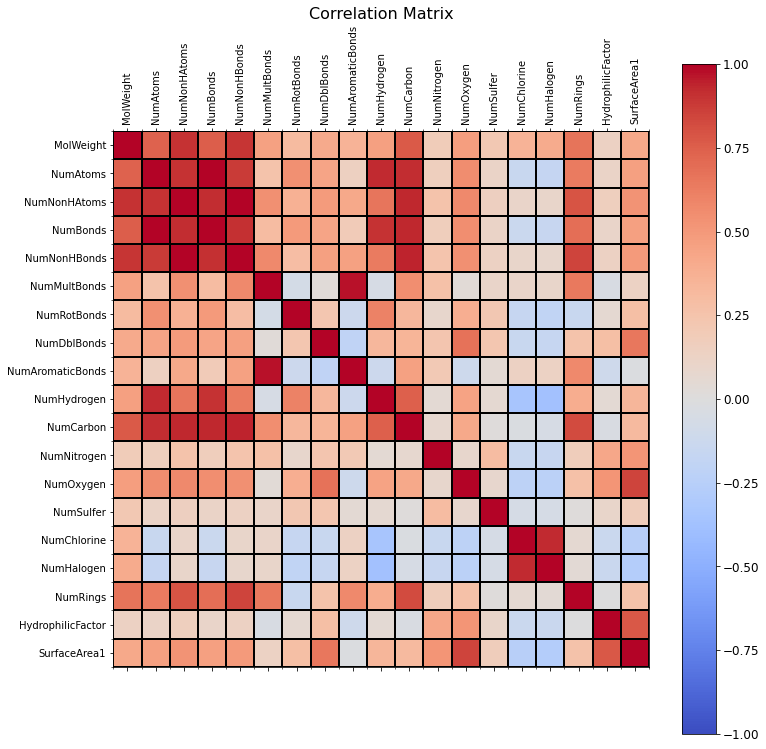

In [114]:


fig1 = plt.figure(figsize=(12, 12))
plt.matshow(selected_df.corr(), fignum=fig1.number, cmap="coolwarm", interpolation='none')
plt.xticks(range(len(selected_df.columns)),selected_df.columns, rotation=90)
plt.yticks(range(len(selected_df.columns)), selected_df.columns)
cb = plt.colorbar()
plt.clim(-1,1)
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16)

# Gridlines based on minor ticks
ax = plt.gca()
ax.set_xticks(np.arange(-.5, len(selected_df.columns), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(selected_df.columns), 1), minor=True)
ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
plt.show()